# Data Analysis
## Ejercicio Exploratory Data Analysis – Project 2

+ 1) Generar un archivo tipo Notebook de Python que contenga el código fuente de:
    - Lectura del archivo vgsales.csv y uso de librerías pandas, plotly, etc.
    - Revisar el EDA del ejercicio anterior y añadir siguientes elementos, basados en los últimos 4 años

        - Crecimiento: 
            - 1. qué género ha tenido el mayor y menor crecimiento, 
            - 2. qué plataforma ha tenido el mayor y menor crecimiento, 
            - 3. qué videojuego ha tenido el mayor y menor crecimiento
            - 2 elementos adicionales que muestren oportunidades de mercado


+ 2) Por cada ejercicio es necesario realizar el código en Python utilizando las funciones
estudiadas.
+ 3) Generar una presentación en Google Slides de máximo 7 slides, donde se
seleccionarán los gráficos y análisis principales. El formato tendrá máximo 2 gráficos
por slide y una explicación de 3-4 líneas. Además de una conclusion final

In [1]:
# Lectura del archivo vgsales.csv y uso de librerías pandas, plotly, etc.
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
os.chdir("C:/Users/Ana Luisa/Documents/Andrés/EBAC Analisis de datos/Introduccion en python parte 2/Modulo 20, Exploratory Data Analysis - Kaggle project 2")
df = pd.read_csv("vgsales.csv")
stringcols = df.select_dtypes(include="object").columns
df[stringcols] = df[stringcols].fillna("").astype(pd.StringDtype())
pd.options.display.float_format = '{:.2f}'.format 
# Masajeo de datos 
df["Year"] = df["Year"].fillna(df["Year"].median())
df["Year"] = df["Year"].replace(2020, 2009)
# Se omitio el año 2017 ya que solo tenia 3 juegos
df.drop(df[df["Year"]>2016].index, inplace=True)


## Basado en los ultimos 4 años 
### Crecimiento: 
- Qué género ha tenido el mayor y menor crecimiento

In [2]:
df1 = df[df["Year"] > 2012] 
genre =pd.pivot_table(df1,values="Global_Sales", index=["Year"], columns=["Genre"],aggfunc=sum).fillna(0).reset_index()
genre


Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2013.00,125.22,6.61,7.21,25.65,25.12,0.99,13.04,44.92,62.80,8.67,41.55,6.33
1,2014.00,99.02,6.06,16.15,23.68,8.89,1.50,16.69,45.86,66.00,5.55,46.66,0.99
2,2015.00,70.70,8.03,7.78,11.69,6.05,0.70,7.92,36.44,66.15,5.62,41.54,1.82
3,2016.00,19.91,1.81,3.86,1.17,2.07,0.00,1.64,6.76,18.22,0.39,14.60,0.50


In [3]:
pctgenre = genre[list(genre.columns)[1:]].pct_change()
pctgenre.mean().sort_values(ascending=False).rename("Crecimiento").reset_index()

,Genre,Crecimiento
0,Fighting,0.07
1,Adventure,-0.18
2,Sports,-0.21
3,Shooter,-0.22
4,Strategy,-0.24
5,Role-Playing,-0.33
6,Puzzle,-0.34
7,Racing,-0.35
8,Action,-0.40
9,Simulation,-0.43


### Que plataforma ha tenido el mayor y menor crecimiento

In [4]:
consola =pd.pivot_table(df1,values="Global_Sales", index=["Year"], columns=["Platform"],aggfunc=sum).fillna(0).reset_index()
consola 

Platform,Year,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013.00,55.88,1.96,12.83,117.39,24.76,3.19,12.69,9.36,21.84,89.61,18.60
1,2014.00,43.14,0.02,13.39,50.96,98.76,0.24,14.74,4.44,22.51,36.42,52.43
2,2015.00,26.99,0.00,8.07,18.22,115.30,0.12,7.10,1.55,16.38,13.05,57.66
3,2016.00,6.60,0.00,2.60,2.59,39.25,0.00,3.40,0.00,3.29,0.83,12.37


In [5]:
pctconsola = consola[list(consola.columns)[1:]].pct_change()
pctconsola.mean().sort_values(ascending=False).rename("Crecimiento").reset_index()

,Platform,Crecimiento
0,PS4,0.83
1,XOne,0.38
2,PSV,-0.29
3,PC,-0.34
4,WiiU,-0.35
5,3DS,-0.45
6,PS3,-0.69
7,X360,-0.72
8,Wii,-0.73
9,PSP,-0.81


### Region con mayor y menor crecimiento en Ventas

In [6]:
region = df1.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
2013.00,154.77,125.80,47.59,39.82
2014.00,131.97,125.65,39.46,40.02
2015.00,102.82,97.71,33.72,30.01
2016.00,22.66,26.76,13.70,7.75


In [7]:
pctregion = region[list(region.columns)[:]].pct_change()
pctregion.mean().sort_values(ascending=False).rename("Crecimiento").reset_index()

,index,Crecimiento
0,JP_Sales,-0.30
1,EU_Sales,-0.32
2,Other_Sales,-0.33
3,NA_Sales,-0.38


In [8]:
df1.groupby("Year").size().rename("Numero de lanzamientos").reset_index()

,Year,Numero de lanzamientos
0,2013.00,546
1,2014.00,582
2,2015.00,614
3,2016.00,344


### Comentarios sobre el crecimiento
- En el 2016 se muestra una disminusion en el numero de videojuegos recopilados por la base de datos, lo cual podria explicar porque gran parte de los porcentajes son negativos dentro del analisis del crecimiento.
- Generos: 
    - En lo que respecta al genero se puede decir que el genero de pelea tuvo un crecimiento mas destacado que los demas generos, sin embargo, cabe destacar que su numero inicial de juegos ya era algo bajo desde el principio, los juegos de aventura se mantienen en una buena posición a lo largo de la serie, ya que ocupaban el tercer o cuarto lugar en los años analizados, seguidos por los deportes que tambien se achicaron.
    - Entre los generos que mas se achicaron dentro de la serie hay que destacar carreras, accion, simulacion musica y plataforma, haciendo enfasis en el genero de accion ya que este es el genero que tiene mayores ingresos a lo largo del periodo analizado, pero la disminucion de los juegos de dicho año provoco que decayeran sus numeros. 
- Plataforma: 
    - El ps4 y el xbox one tuvieron un mayor crecimiento ya que son las consolas que empezaron a comercializarse a partir de finales de 2013, la mayoria de las demas consolas empezaron a salir de ciculacion por ese tiempo, enfatizando a ps3 y xbox 360 que fueron los predecesores de dichas consolas.
    - Como dato interesante hay que destacar a PC que ha sido una plataforma unica, que no tiene un sucesor, sino que se va actualizando y a pesar de esto no tiene el impacto de las consolas en lo que respecta a videojuegos.
- Respecto a la region, la informacion presentada no es capaz de mostrar un crecimiento promedio en ninguna parte, por el contrario, durante este periodo se puede ver como las ventas caen año con año.  
     

### Juegos mas vendidos por cada año
- Durante 2013 y 2014 el juego que mas genero ganancias fue gta que llego a plataformas de generaciones distintas

In [9]:
df1.groupby("Year").first()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2013.00,17,Grand Theft Auto V,PS3,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2014.00,45,Grand Theft Auto V,PS4,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
2015.00,34,Call of Duty: Black Ops 3,PS4,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2016.00,222,FIFA 17,PS4,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77


### Serie de tiempo:
- Ventas por region por plataforma durante todo el tiempo de la serie 
    - Durante la mayor parte del tiempo de la serie estan a la cabeza las ventas en norte america exceptuando los años mas proximos donde tomo ventaja europa.

<AxesSubplot:title={'center':'Ventas por region y por plataforma'}, xlabel='Year,Platform'>

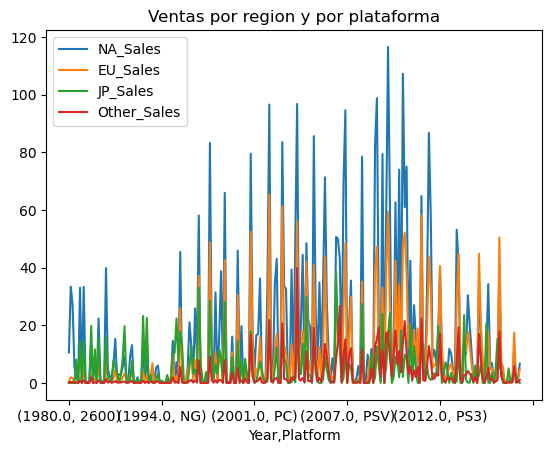

In [21]:
df.groupby(by=["Year","Platform"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().sort_values("Year").plot(title="Ventas por region y por plataforma")

### Top 5 Videojuegos de los ultimos 4 años 
- Los videojuegos que mas dinero han recaudado de los ultimos 4 años son juegos multijugador que se van actualizando, se toman en cuenta sus ingresos de varios años, a diferencia de otros titulos que solo prevalecen por uno.
como mayor exponente se puede identificar a GTA V que puede verse en la tabla en 2013 para ps3 y xbox 360, en 2014 para ps4 y xbox one y en 2015 para PC

<AxesSubplot:title={'center':'Top 5 de videojuegos de los ultimos 4 años'}, ylabel='Name'>

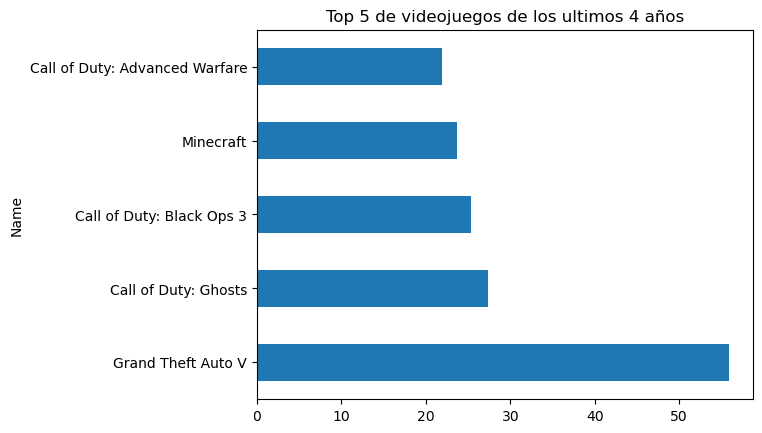

In [20]:
df1.groupby(["Name"]).sum()["Global_Sales"].sort_values(ascending=False).head().plot.barh(title = "Top 5 de videojuegos de los ultimos 4 años")

### Insights: 2 elementos adicionales que muestren oportunidades de mercado

<AxesSubplot:title={'center':'Cantidad de videojuegos por genero de los ultimos 4 años'}, xlabel='Year,Genre'>

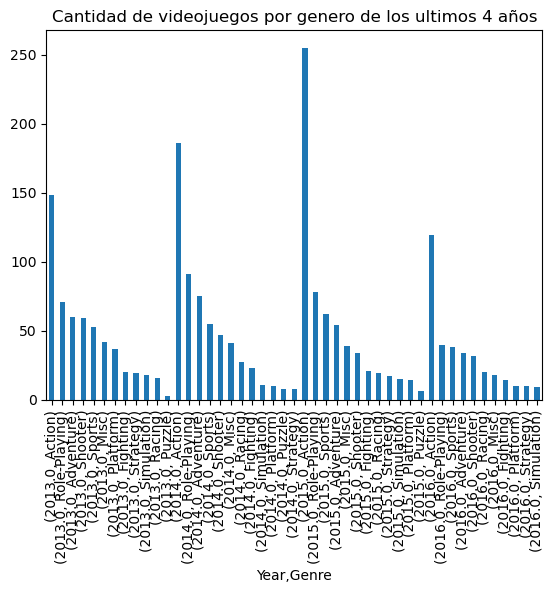

In [12]:
df1.groupby("Year")["Genre"].value_counts().plot.bar(title="Cantidad de videojuegos por genero de los ultimos 4 años")

### Ganacias por genero 
- Los juegos de rol son por lo general la segunda categoria mas vista en la base de datos, pero mantiene menor desempeño en ventas que los generos de juegos de disparos y de deportes, con excepcion de los deportes durante el 2013 donde estan bastante igualados conforme a ganancias, esta informacion podria ser una buena razon para invertir mas en juegos de deportes y de disparos, ya que con menores juegos superan en ganancias a generos que los superan, ya sea en cantidad de juegos desarrollados o mayores lanzamientos en diferentes plataformas.

<AxesSubplot:title={'center':'Ganancias totales por genero de los ultimos 4 años'}, xlabel='Year'>

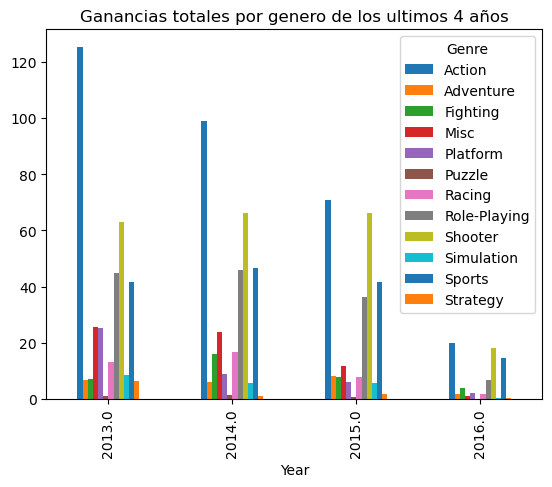

In [17]:
pd.crosstab(df1["Year"], df1["Genre"], values=df1.Global_Sales, aggfunc="sum").fillna(0).plot.bar(title="Ganancias totales por genero de los ultimos 4 años")

### Nuevas generaciones
- A partir del lanzamiento de la nueva generacion de una consola, la predesesora comienza a ser desplazada del mercado. 

<AxesSubplot:title={'center':'Ventas anuales por plataforma desde el 2013'}, xlabel='Year'>

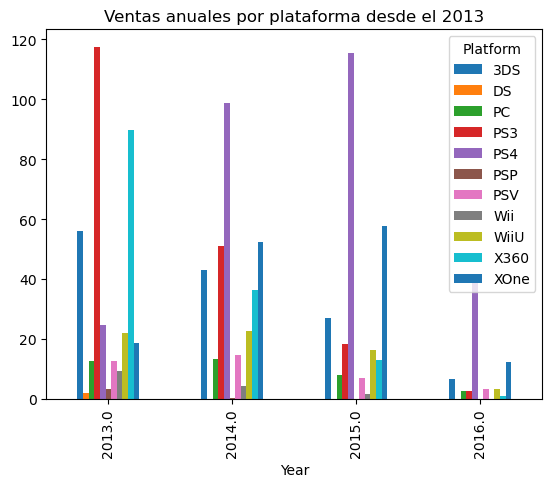

In [18]:
pd.crosstab(df1["Year"], df1["Platform"], values=df1.Global_Sales, aggfunc="sum").fillna(0).plot.bar(title = "Ventas anuales por plataforma desde el 2013")

<AxesSubplot:title={'center':'Top 10 publishers con mayores ganacias'}, ylabel='Publisher'>

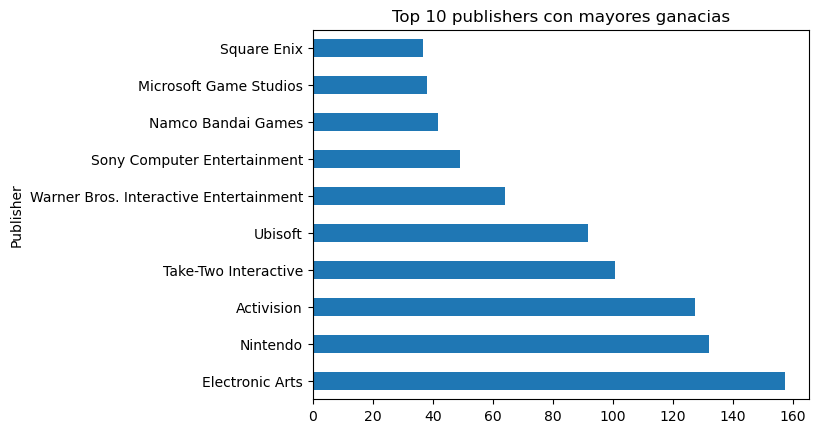

In [19]:
df1.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10).plot.barh(title = "Top 10 publishers con mayores ganacias")

<AxesSubplot:title={'center':'Serie de tiempo de ventas por Region'}, xlabel='Year'>

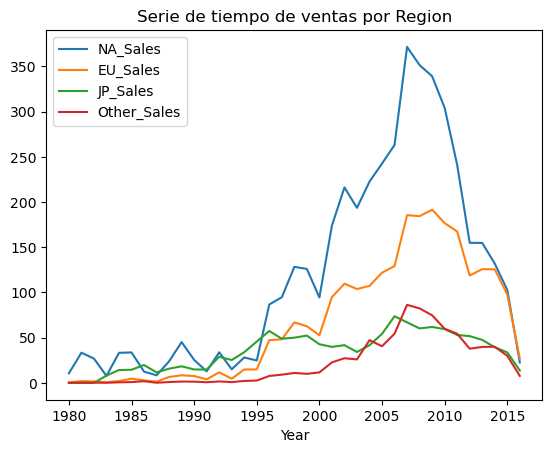

In [16]:
df[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales","Year", "Platform"]].groupby(["Year"]).sum().plot(title= "Serie de tiempo de ventas por Region")